In [17]:
import pandas as pd
import numpy as np
q2 = pd.read_csv("BackOrders.csv")
q2['went_on_backorder'].replace({'Yes': 1,'No':0}, inplace = True)
y = q2['went_on_backorder'].to_numpy()
q2.pop('sku')
q2.pop('went_on_backorder')
categorical_columns = (q2.dtypes == 'object')
object_cols = list(categorical_columns[categorical_columns].index)
print(object_cols)
q2 = q2.fillna(q2.mean())
print("if null: ", q2.isnull().values.any())
q2.head()

['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']
if null:  False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,117,7.559619,0,0,0,0,0,0,15,15,...,No,0,-99.00,-99.00,0,No,No,Yes,Yes,No
1,7,2.000000,0,0,0,0,0,0,0,0,...,No,0,0.50,0.28,0,Yes,No,No,Yes,No
2,258,15.000000,10,10,77,184,46,132,256,365,...,No,0,0.54,0.70,0,No,No,No,Yes,No
3,46,2.000000,0,0,0,0,1,2,6,9,...,No,0,0.75,0.90,0,Yes,No,No,Yes,No
4,2,2.000000,0,4,6,10,2,2,5,6,...,No,0,0.97,0.92,0,No,No,No,Yes,No


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop='first')
feature_array = ohe.fit_transform(q2[object_cols]).toarray()

numeric_col = (q2.dtypes != 'object')
numeric_list = list(numeric_col[numeric_col].index)
sc_X = StandardScaler()
others = sc_X.fit_transform(q2[numeric_list])

X = np.concatenate((feature_array, others), axis=1)
print(np.shape(X))

(61589, 21)


In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Activation, Dense 
import matplotlib.pyplot as plt

model 1

Epoch 1/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4953 - accuracy: 0.8104 - val_loss: 0.4737 - val_accuracy: 0.8158
Epoch 2/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4681 - accuracy: 0.8169 - val_loss: 0.4689 - val_accuracy: 0.8159
Epoch 3/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4651 - accuracy: 0.8169 - val_loss: 0.4664 - val_accuracy: 0.8160
Epoch 4/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4635 - accuracy: 0.8169 - val_loss: 0.4647 - val_accuracy: 0.8159
Epoch 5/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4624 - accuracy: 0.8171 - val_loss: 0.4637 - val_accuracy: 0.8159
Epoch 6/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4617 - accuracy: 0.8171 - val_loss: 0.4628 - val_accuracy: 0.8160
Epoch 7/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4611 - accuracy: 0.8171 - val_loss: 0.4621 - val_ac

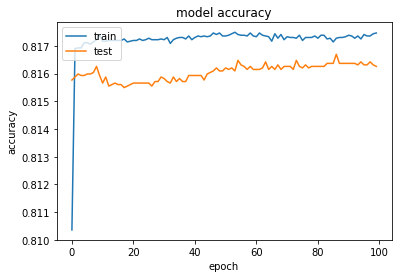

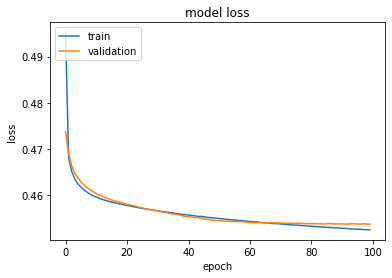

In [24]:
neural_network = tf.keras.Sequential()
neural_network.add(Dense(1, input_dim=np.shape(X_train)[1], activation = 'sigmoid'))
neural_network.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history = neural_network.fit(X_train, y_train, epochs=100, validation_split=0.33)
# summarize history for accuracy
history_dict = history.history
print(history_dict.keys())
print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
predictions = neural_network.predict(X_test)
y_pred = (predictions > 0.5)
confusion_matrix(y_test, y_pred)

193/193 [==============================] - 0s 1ms/step


array([[5040,    0],
       [1111,    8]])

In [26]:
neural_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 22        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


**model 2**:

Epoch 1/100
1161/1161 [==============================] - 4s 3ms/step - loss: 0.4780 - accuracy: 0.8122 - val_loss: 0.4641 - val_accuracy: 0.8164
Epoch 2/100
1161/1161 [==============================] - 4s 3ms/step - loss: 0.4607 - accuracy: 0.8178 - val_loss: 0.4604 - val_accuracy: 0.8169
Epoch 3/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4580 - accuracy: 0.8179 - val_loss: 0.4580 - val_accuracy: 0.8175
Epoch 4/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4562 - accuracy: 0.8184 - val_loss: 0.4563 - val_accuracy: 0.8169
Epoch 5/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4547 - accuracy: 0.8184 - val_loss: 0.4546 - val_accuracy: 0.8170
Epoch 6/100
1161/1161 [==============================] - 4s 3ms/step - loss: 0.4533 - accuracy: 0.8186 - val_loss: 0.4534 - val_accuracy: 0.8171
Epoch 7/100
1161/1161 [==============================] - 2s 2ms/step - loss: 0.4522 - accuracy: 0.8188 - val_loss: 0.4521 - val_ac

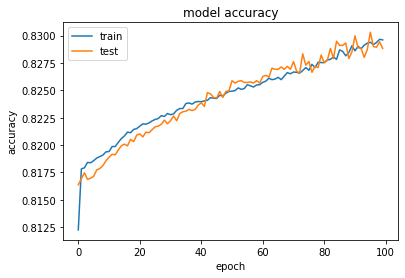

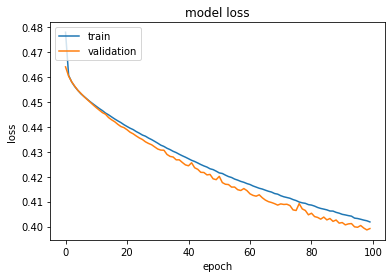

In [27]:
model= tf.keras.Sequential()
model.add(Dense(15, input_dim=np.shape(X_train)[1], activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.33)
# summarize history for accuracy
history_dict = history.history
print(history_dict.keys())
print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)
confusion_matrix(y_test, y_pred)
model.summary()

193/193 [==============================] - 0s 1ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [29]:
confusion_matrix(y_test, y_pred)

array([[5009,   31],
       [1023,   96]])

model 3

Epoch 1/100
1161/1161 [==============================] - 4s 3ms/step - loss: 0.4772 - accuracy: 0.8095 - val_loss: 0.4629 - val_accuracy: 0.8145
Epoch 2/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4590 - accuracy: 0.8167 - val_loss: 0.4579 - val_accuracy: 0.8160
Epoch 3/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4547 - accuracy: 0.8176 - val_loss: 0.4542 - val_accuracy: 0.8182
Epoch 4/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4514 - accuracy: 0.8186 - val_loss: 0.4510 - val_accuracy: 0.8180
Epoch 5/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.8193 - val_loss: 0.4475 - val_accuracy: 0.8190
Epoch 6/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4461 - accuracy: 0.8199 - val_loss: 0.4448 - val_accuracy: 0.8192
Epoch 7/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4436 - accuracy: 0.8205 - val_loss: 0.4422 - val_ac

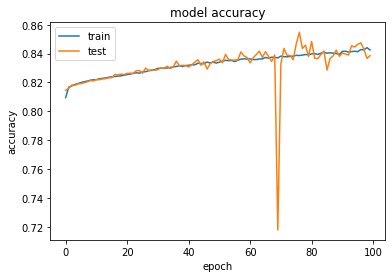

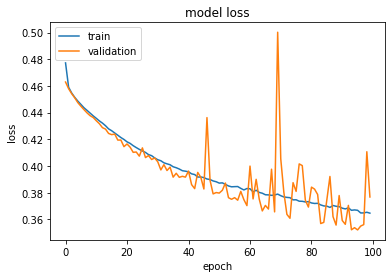

In [30]:
mod= tf.keras.Sequential()
mod.add(Dense(25, input_dim=np.shape(X_train)[1], activation = 'tanh'))
mod.add(Dense(15, activation = 'tanh'))
mod.add(Dense(1, activation = 'sigmoid'))
mod.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

history = mod.fit(X_train, y_train, epochs=100, validation_split=0.33)
# summarize history for accuracy
history_dict = history.history
print(history_dict.keys())
print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
predictions = mod.predict(X_test)
y_pred = (predictions > 0.5)
mod.summary()

193/193 [==============================] - 0s 1ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                550       
                                                                 
 dense_5 (Dense)             (None, 15)                390       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________


In [32]:
confusion_matrix(y_test, y_pred)

array([[4988,   52],
       [ 965,  154]])

**model 4**

Epoch 1/100
1161/1161 [==============================] - 4s 3ms/step - loss: 0.8202 - accuracy: 0.8108 - val_loss: 0.7354 - val_accuracy: 0.8168
Epoch 2/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.6802 - accuracy: 0.8175 - val_loss: 0.6346 - val_accuracy: 0.8169
Epoch 3/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.6003 - accuracy: 0.8175 - val_loss: 0.5724 - val_accuracy: 0.8170
Epoch 4/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.5508 - accuracy: 0.8175 - val_loss: 0.5339 - val_accuracy: 0.8169
Epoch 5/100
1161/1161 [==============================] - 3s 2ms/step - loss: 0.5202 - accuracy: 0.8174 - val_loss: 0.5100 - val_accuracy: 0.8168
Epoch 6/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.5008 - accuracy: 0.8173 - val_loss: 0.4948 - val_accuracy: 0.8169
Epoch 7/100
1161/1161 [==============================] - 3s 3ms/step - loss: 0.4888 - accuracy: 0.8173 - val_loss: 0.4853 - val_ac

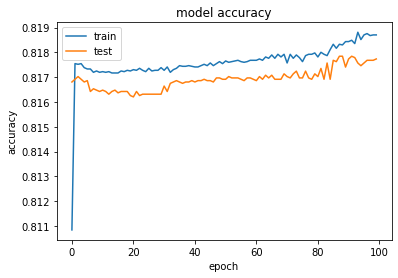

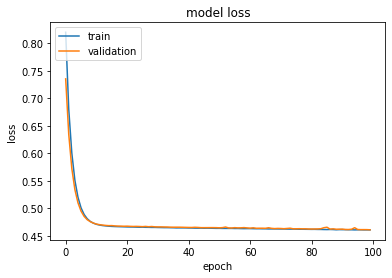

In [33]:
from tensorflow.keras import regularizers
from keras.regularizers import L2
mod4= tf.keras.Sequential()
mod4.add(Dense(25, input_dim=np.shape(X_train)[1], activation = 'tanh', kernel_regularizer=regularizers.L2(0.01), bias_regularizer = regularizers.L2(0.05)))
mod4.add(Dense(15, activation = 'tanh', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.05)))
mod4.add(Dense(1, activation = 'sigmoid'))
mod4.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

history = mod4.fit(X_train, y_train, epochs=100, validation_split=0.33)
# summarize history for accuracy
history_dict = history.history
print(history_dict.keys())
print(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
predictions = mod4.predict(X_test)
y_pred = (predictions > 0.5)
mod4.summary()

193/193 [==============================] - 0s 1ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 25)                550       
                                                                 
 dense_8 (Dense)             (None, 15)                390       
                                                                 
 dense_9 (Dense)             (None, 1)                 16        
                                                                 
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________


In [35]:
confusion_matrix(y_test, y_pred)

array([[5027,   13],
       [1094,   25]])